In [1]:
import nltk
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [5]:
# Cleaning and preprocessing

# Drop rows with missing 'Brand Name' or 'Price'
df = df.dropna(subset=['Brand Name', 'Price'])

# Fill missing 'Reviews' with an empty string and 'Review Votes' with 0
df['Reviews'] = df['Reviews'].fillna('')
df['Review Votes'] = df['Review Votes'].fillna(0)

# Convert 'Price' and 'Review Votes' to numeric format
df['Price'] = pd.to_numeric(df['Price'])
df['Review Votes'] = pd.to_numeric(df['Review Votes'])

# Convert 'Rating' to integer format
df['Rating'] = df['Rating'].astype(int)

# Remove duplicate rows
df = df.drop_duplicates()

# Normalize text data by converting to lowercase
df['Product Name'] = df['Product Name'].str.lower()
df['Reviews'] = df['Reviews'].str.lower()

# Remove punctuation from 'Reviews'
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]', '')

# Remove stopwords from 'Reviews'
stop_words = set(stopwords.words('english'))
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Lemmatize the words in 'Reviews'
lemmatizer = WordNetLemmatizer()
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

# Check the cleaned data
df.dtypes


Product Name     object
Brand Name       object
Price           float64
Rating            int32
Reviews          object
Review Votes    float64
dtype: object

In [6]:
Reviews = df['Reviews']
print(len(Reviews))

print(len(list(set(df['Brand Name']))))

Brand_Name = df['Brand Name'].str.upper()
print(Brand_Name.value_counts().head(10))

Price = df['Price']
print(Price.mean())

291249
378
Brand Name
SAMSUNG       56517
APPLE         49994
BLU           49901
LG            19028
NOKIA         14816
BLACKBERRY    14813
MOTOROLA      11265
HTC           11146
CNPGD         10444
SONY           6715
Name: count, dtype: int64
224.22168347359136


In [7]:
df['Product Name'] = df['Product Name'].str.lower()
df['Reviews'] = df['Reviews'].str.lower()

In [8]:
Reviews = df['Reviews']
len(Reviews)

291249

In [9]:
len(list(set(df['Brand Name'])))

378

In [10]:
Brand_Name = df['Brand Name'].str.upper()
Brand_Name.value_counts().head(10)

Brand Name
SAMSUNG       56517
APPLE         49994
BLU           49901
LG            19028
NOKIA         14816
BLACKBERRY    14813
MOTOROLA      11265
HTC           11146
CNPGD         10444
SONY           6715
Name: count, dtype: int64

In [11]:
Price = df['Price']
Price.mean()

224.22168347359136

Distribution graphs (histogram/bar graph)

In [12]:
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt # plotting
# import numpy as np # linear algebra
# import os # accessing directory structure
# import pandas as pd 

In [13]:
# import matplotlib.pyplot as plt
# import numpy as np

# def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
#     nunique = df.nunique()
#     # Filter columns with 1 to 50 unique values
#     df = df[[col for col in df if 1 < nunique[col] < 50]]
#     nRow, nCol = df.shape
#     columnNames = list(df)
#     nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Ensure nGraphRow is an integer
#     plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
#     for i in range(min(nCol, nGraphShown)):
#         plt.subplot(nGraphRow, nGraphPerRow, i + 1)
#         columnDf = df.iloc[:, i]
#         if not np.issubdtype(type(columnDf.iloc[0]), np.number):
#             valueCounts = columnDf.value_counts()
#             valueCounts.plot.bar()
#         else:
#             columnDf.hist()
#         plt.ylabel('counts')
#         plt.xticks(rotation=90)
#         plt.title(f'{columnNames[i]} (column {i})')
#     plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
#     plt.show()



In [14]:
# plotPerColumnDistribution(df, 10, 5)

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
import re
import pandas as pd

# Faster text cleaning using regular expressions and Python's split
def clean_review_fast(review):
    # Lowercase the text
    review = review.lower()
    # Remove punctuation using regular expressions
    review = re.sub(r'[^\w\s]', '', review)  
    # Split the text into sentences using '.' as a delimiter
    sentences = review.split('.')
    return [sentence.strip() for sentence in sentences if sentence.strip()]

# Apply the faster cleaning and phrase extraction function
df['cleaned_phrases'] = df['Reviews'].apply(clean_review_fast)

# Example: Check the first few rows
df[['Reviews', 'cleaned_phrases']].head()


,Reviews,cleaned_phrases
0,feel lucky found used ( phone u & used hard ) ...,[feel lucky found used phone u used hard p...
1,"nice phone , nice grade pantach revue . clean ...",[nice phone nice grade pantach revue clean s...
2,pleased,[pleased]
3,work good go slow sometimes good phone love,[work good go slow sometimes good phone love]
4,great phone replace lost phone . thing volume ...,[great phone replace lost phone thing volume ...


In [24]:
import numpy as np
# Load the GloVe embeddings into a dictionary
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Example: Load GloVe 300-dimensional embeddings
glove_file_path = 'glove.6B.300d.txt'  # Path to the GloVe file
glove_embeddings = load_glove_embeddings(glove_file_path)

# Now `glove_embeddings` is defined and can be used


In [25]:
# Function to get GloVe embedding for a word
def get_word_embedding(word, embeddings_index, embedding_dim=300):
    return embeddings_index.get(word, np.zeros(embedding_dim))

# Function to get the average GloVe embedding for a phrase
def get_phrase_embedding(phrase, embeddings_index, embedding_dim=300):
    words = phrase.split()  # Split phrase into words
    word_embeddings = [get_word_embedding(word, embeddings_index, embedding_dim) for word in words]
    if len(word_embeddings) > 0:
        return np.mean(word_embeddings, axis=0)  # Average word embeddings to get phrase embedding
    else:
        return np.zeros(embedding_dim)  # Return zero vector if no embeddings

# Apply GloVe embeddings to each phrase
df['Phrase_Embeddings'] = df['cleaned_phrases'].apply(lambda phrases: [get_phrase_embedding(phrase, glove_embeddings) for phrase in phrases])

# Example: Check the phrase embeddings for the first few rows
df[['cleaned_phrases', 'Phrase_Embeddings']].head()


,cleaned_phrases,Phrase_Embeddings
0,[feel lucky found used phone u used hard p...,"[[-0.15108447178806128, 0.10762823902462658, -..."
1,[nice phone nice grade pantach revue clean s...,"[[-0.2946464554794754, 0.0988743322280546, -0...."
2,[pleased],"[[0.45006, 0.019687, 0.14389, -0.68812, -0.059..."
3,[work good go slow sometimes good phone love],"[[-0.1789889, 0.008201499, -0.027085625, -0.01..."
4,[great phone replace lost phone thing volume ...,"[[-0.24150211855562198, 0.01832961363510953, 0..."


In [26]:
from sklearn.cluster import KMeans
import numpy as np

# Flatten phrase embeddings into a single list
phrase_embeddings_flat = [embedding for embeddings in df['Phrase_Embeddings'] for embedding in embeddings]

# Convert to NumPy array for clustering
phrase_embeddings_flat = np.array(phrase_embeddings_flat)


In [27]:
# Step 1: Flatten the list of phrase embeddings, ensuring no empty embeddings
phrase_embeddings_flat = []
for embeddings in df['Phrase_Embeddings']:
    if embeddings:  # Only include non-empty embeddings
        phrase_embeddings_flat.extend(embeddings)

# Convert the list to a NumPy array (for clustering)
phrase_embeddings_flat = np.array(phrase_embeddings_flat)


In [28]:
from sklearn.cluster import KMeans

# Step 2: Apply KMeans clustering
n_clusters = 10  # Adjust based on the number of latent features you expect
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(phrase_embeddings_flat)


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Step 3: Assign clusters to each phrase embedding
def assign_clusters(phrase_embeddings):
    if len(phrase_embeddings) > 0:
        return kmeans.predict(phrase_embeddings)  # Predict cluster for each phrase
    else:
        return []  # Handle cases where no embeddings exist

df['Phrase_Clusters'] = df['Phrase_Embeddings'].apply(assign_clusters)

# Step 4: Check the cluster assignments for the first few rows
df[['cleaned_phrases', 'Phrase_Clusters']].head()


,cleaned_phrases,Phrase_Clusters
0,[feel lucky found used phone u used hard p...,[8]
1,[nice phone nice grade pantach revue clean s...,[8]
2,[pleased],[9]
3,[work good go slow sometimes good phone love],[9]
4,[great phone replace lost phone thing volume ...,[8]


machine learning on the feature clusters

In [30]:
# Map the Rating to Sentiment (Proxy Labels)
def assign_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment labels based on the Rating field
df['Sentiment'] = df['Rating'].apply(assign_sentiment)


In [31]:
import numpy as np

# Initialize empty lists for features and labels
X, y = [], []

# Iterate through the dataframe row by row to extract embeddings and sentiment labels
for index, row in df.iterrows():
    embeddings = row['Phrase_Embeddings']
    sentiment = row['Sentiment']
    
    # For each phrase embedding, append the embedding and corresponding sentiment
    for embedding in embeddings:
        X.append(embedding)
        y.append(sentiment)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)


In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lightgbm

In [33]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Convert sentiment labels to numerical values
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
y_train_numeric = np.array([sentiment_mapping[label] for label in y_train])
y_test_numeric = np.array([sentiment_mapping[label] for label in y_test])

# Step 2: Prepare LightGBM dataset with numerical labels
train_data = lgb.Dataset(X_train, label=y_train_numeric)
test_data = lgb.Dataset(X_test, label=y_test_numeric)

# Step 3: Set LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': 3,  # Positive, Neutral, Negative
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'verbosity': -1,
}

# Step 4: Train the LightGBM model with early stopping using callbacks
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=100,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Step 5: Predict on test data
y_pred = np.argmax(lgb_model.predict(X_test), axis=1)

# Step 6: Map predictions back to sentiment labels for evaluation
inverse_sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
y_pred_labels = np.array([inverse_sentiment_mapping[pred] for pred in y_pred])
y_test_labels = np.array([inverse_sentiment_mapping[actual] for actual in y_test_numeric])

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"LightGBM Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test_labels, y_pred_labels))


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.394951	valid_1's multi_logloss: 0.42511
LightGBM Accuracy: 84.52%
              precision    recall  f1-score   support

    Negative       0.77      0.79      0.78     14134
     Neutral       0.85      0.12      0.22      4666
    Positive       0.87      0.95      0.91     39343

    accuracy                           0.85     58143
   macro avg       0.83      0.62      0.63     58143
weighted avg       0.84      0.85      0.82     58143



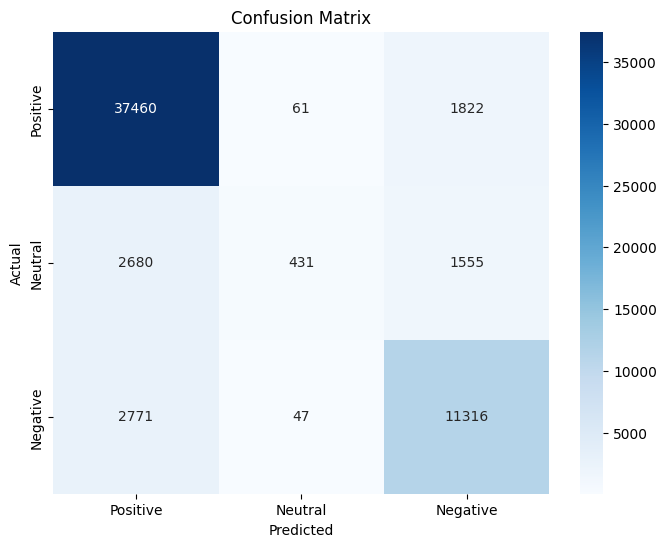

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=['Positive', 'Neutral', 'Negative'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [36]:
pip install catboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


CATBOOST

In [37]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Convert sentiment labels to numerical values
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
y_train_numeric = np.array([sentiment_mapping[label] for label in y_train])
y_test_numeric = np.array([sentiment_mapping[label] for label in y_test])

# Step 2: Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=500,             # Number of boosting iterations
    depth=6,                    # Depth of each tree (you can adjust this)
    learning_rate=0.1,          # Learning rate
    loss_function='MultiClass', # Specify it’s a multiclass problem
    verbose=100,                # Display training progress every 100 iterations
    random_seed=42              # For reproducibility
)

# Step 3: Train the model
catboost_model.fit(X_train, y_train_numeric, eval_set=(X_test, y_test_numeric), early_stopping_rounds=10)

# Step 4: Predict on test data
y_pred = catboost_model.predict(X_test)
y_pred = y_pred.flatten()  # Convert to 1D array if needed

# Step 5: Map predictions back to sentiment labels
inverse_sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
y_pred_labels = np.array([inverse_sentiment_mapping[pred] for pred in y_pred])
y_test_labels = np.array([inverse_sentiment_mapping[actual] for actual in y_test_numeric])

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"CatBoost Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test_labels, y_pred_labels))


0:	learn: 1.0132278	test: 1.0132661	best: 1.0132661 (0)	total: 821ms	remaining: 6m 49s
100:	learn: 0.4984714	test: 0.5032153	best: 0.5032153 (100)	total: 1m 43s	remaining: 6m 49s
200:	learn: 0.4571093	test: 0.4683096	best: 0.4683096 (200)	total: 3m 22s	remaining: 5m 1s
300:	learn: 0.4304548	test: 0.4474561	best: 0.4474561 (300)	total: 4m 59s	remaining: 3m 18s
400:	learn: 0.4096625	test: 0.4318878	best: 0.4318878 (400)	total: 6m 35s	remaining: 1m 37s
499:	learn: 0.3920999	test: 0.4191713	best: 0.4191713 (499)	total: 8m 10s	remaining: 0us

bestTest = 0.4191712888
bestIteration = 499

CatBoost Accuracy: 84.63%
              precision    recall  f1-score   support

    Negative       0.77      0.80      0.79     14134
     Neutral       0.80      0.09      0.17      4666
    Positive       0.87      0.95      0.91     39343

    accuracy                           0.85     58143
   macro avg       0.81      0.62      0.62     58143
weighted avg       0.84      0.85      0.82     58143



In [38]:
print(df.columns)


Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes', 'cleaned_phrases', 'Phrase_Embeddings',
       'Phrase_Clusters', 'Sentiment'],
      dtype='object')


In [40]:
import numpy as np

# Step 1: Convert sentiment labels to numerical values
sentiment_to_score = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# Convert 'Sentiment' to numerical scores (no need to iterate over lists)
df['Sentiment_Scores'] = df['Sentiment'].apply(lambda sent: sentiment_to_score[sent])

# Function to aggregate sentiment scores by clusters
def aggregate_sentiment_scores(phrase_clusters, sentiment_scores):
    cluster_sentiment_dict = {}
    # Combine the clusters and corresponding sentiment scores
    for cluster, score in zip(phrase_clusters, sentiment_scores):
        if cluster not in cluster_sentiment_dict:
            cluster_sentiment_dict[cluster] = []
        cluster_sentiment_dict[cluster].append(score)
    
    # Average the sentiment scores for each feature cluster
    aggregated_scores = {cluster: np.mean(scores) for cluster, scores in cluster_sentiment_dict.items()}
    return aggregated_scores

# Apply the aggregation function to each row
df['Aggregated_Sentiment_Scores'] = df.apply(
    lambda row: aggregate_sentiment_scores(row['Phrase_Clusters'], [row['Sentiment_Scores']]), axis=1
)

# Display the results
print(df[['Product Name', 'Aggregated_Sentiment_Scores']].head())


                                        Product Name  \
0  "clear clean esn" sprint epic 4g galaxy sph-d7...   
1  "clear clean esn" sprint epic 4g galaxy sph-d7...   
2  "clear clean esn" sprint epic 4g galaxy sph-d7...   
3  "clear clean esn" sprint epic 4g galaxy sph-d7...   
4  "clear clean esn" sprint epic 4g galaxy sph-d7...   

  Aggregated_Sentiment_Scores  
0                    {8: 1.0}  
1                    {8: 1.0}  
2                    {9: 1.0}  
3                    {9: 1.0}  
4                    {8: 1.0}  


In [51]:
import numpy as np

# Function to recommend products based on user-specified features
def recommend_products_based_on_features(user_features, df):
    # Ensure user input features are stripped of extra whitespace
    user_features = [feature.strip().lower() for feature in user_features]
    
    # Filter relevant features' sentiment scores
    df['Relevant_Sentiment_Scores'] = df['Aggregated_Sentiment_Scores'].apply(
        lambda scores: {feature: score for feature in user_features if feature in scores}
    )
    
    # Compute overall sentiment score for each product
    df['Overall_Sentiment_Score'] = df['Relevant_Sentiment_Scores'].apply(
        lambda scores: np.mean(list(scores.values())) if scores else 0
    )
    
    # Drop duplicate products
    ranked_df = df.drop_duplicates(subset=['Product Name', 'Brand Name'])
    
    # Rank products by overall sentiment score (highest to lowest)
    ranked_df = ranked_df.sort_values(by='Overall_Sentiment_Score', ascending=False)
    
    # Return relevant columns for recommendation
    return ranked_df[['Product Name', 'Brand Name', 'Price', 'Rating']]

# Taking user input for desired features
#user_features = input("Enter the features you're interested in, separated by commas: ").split(',')
user_features = ['battery','camera']

# Example: Recommend products based on user input features
ranked_recommendations = recommend_products_based_on_features(user_features, df)

# Display the ranked list of recommended products
print(ranked_recommendations.head(5))


                                             Product Name   Brand Name  \
0       "clear clean esn" sprint epic 4g galaxy sph-d7...      Samsung   
297941  posh mobile orion s450 android smartphone unlo...  Posh Mobile   
298092  posh mobile primo c353 cellphone, 512mb rom, 4...  Posh Mobile   
298097  posh mobile primo plus android unlocked dual s...  Posh Mobile   
298107  posh mobile primo plus android unlocked dual s...  Posh Mobile   

         Price  Rating  
0       199.99       5  
297941  114.99       5  
298092   34.99       5  
298097   39.99       5  
298107   29.99       5  


In [53]:
import numpy as np

# Function to recommend products based on user-specified features and brands
def recommend_products_based_on_features_and_brands(user_features, user_brands, df):
    # Ensure user input features and brands are stripped of extra whitespace and converted to lowercase
    user_features = [feature.strip().lower() for feature in user_features]
    user_brands = [brand.strip().lower() for brand in user_brands]
    
    # Filter relevant features' sentiment scores
    df['Relevant_Sentiment_Scores'] = df['Aggregated_Sentiment_Scores'].apply(
        lambda scores: {feature: score for feature in user_features if feature in scores}
    )
    
    # Compute overall sentiment score for each product
    df['Overall_Sentiment_Score'] = df['Relevant_Sentiment_Scores'].apply(
        lambda scores: np.mean(list(scores.values())) if scores else 0
    )
    
    ranked_df = df.drop_duplicates(subset=['Product Name', 'Brand Name'])
    
    # Filter products by user-specified brands
    if user_brands:
        ranked_df = ranked_df[ranked_df['Brand Name'].str.lower().isin(user_brands)]
    
    # Rank products by overall sentiment score (highest to lowest)
    ranked_df = ranked_df.sort_values(by='Overall_Sentiment_Score', ascending=False)
    
    # Return relevant columns for recommendation
    return ranked_df[['Product Name', 'Brand Name', 'Price', 'Rating']]

# Taking user input for desired features and brands
#user_features = input("Enter the features you're interested in, separated by commas: ").split(',')
#user_brands = input("Enter the brands you're interested in, separated by commas (leave empty if not specified): ").split(',')
user_features = ['battery','camera']
user_brands = ['Samsung']
# Example: Recommend products based on user input features and brands
ranked_recommendations = recommend_products_based_on_features_and_brands(user_features, user_brands, df)

# Display the ranked list of recommended products
print(ranked_recommendations.head(5))


                                             Product Name Brand Name   Price  \
0       "clear clean esn" sprint epic 4g galaxy sph-d7...    Samsung  199.99   
363416  samsung galaxy s6 edge plus sm-g928 64gb cell ...    Samsung  399.99   
363695  samsung galaxy s6 edge sm-925v 64gb white smar...    Samsung  487.93   
363703  samsung galaxy s6 edge sm-g925 factory unlocke...    Samsung  449.99   
364890  samsung galaxy s6 edge sm-g925f 128gb gold fac...    Samsung  699.00   

        Rating  
0            5  
363416       5  
363695       5  
363703       5  
364890       5  
